# Project 1: Errors in Regression 
Math 4377, Fall 2022 <br /> 
Katie Rink : *11.08.2022*

## Overview

$E(y_{0} - \hat f(x_{0}))^2 = Var(\hat f(x_{0})) + [Bias(\hat f(x_{0}))]^2 + Var(ϵ)$

$Var(\hat f)$ is the Variance : *Amount by which $\hat f$ would change if we estimated it using a different training set*

$Bias(\hat f) = E(\hat f) - f$ is the Bias : *Error from approximating a complicated problem with a simpler model*

$Var(ϵ)$ is the irreducible error. 

In [1]:
#import statements
import numpy as np 
from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure
from csaps import csaps
from numpy import zeros
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import random
from sklearn.model_selection import train_test_split

## Data Generation

To begin analysis, we need to first create data points to create models for. To get a grasp on how our models adapt to different circumstances, I wanted to create data points adhereing to the patterns of linear, quadratic, and nonlinear data points. 

#### Models :
  1) Linear : $f(x) = ax+b$ 


  2) Quadratic : $f(x) = ax^2 + bx + c$


  3) Nonlinear : $f(x) = x sin x, f(x) = {1 \over 1 + 25x^2}, etc.$

#### Loading Dataset
In order to generate our models, I take in the length of the dataset we want, the range of which the values can fall in, and a random seed to create noise. I then generated a dataspace of points within the specified range with the noise generated by the seed. I then alligned those points to linear, then a quadratic, then a nonlinear function. Finally, I modified the mean and the variance with a random number to add noise to said function.

In [2]:
#Generate Linear Model Points
def linear_data(n=30, range=5., seed=1234, var_noise=0):
    #Introducing noise using a random seed
    np.random.seed(seed)
    x = np.linspace(-range, range, n)
    
    #Define the underlying function of the data
    f = lambda x : x
    
    #adding noise
    mean = .2
    var = var_noise
    y = f(x) + (np.random.rand(n) - mean) * var 
    
    return x, y

In [3]:
#Generate Quadratic Model Points
def quad_data(n=25, range=5., seed=1234, var_noise=0):
    #Introducing noise using a random seed
    np.random.seed(seed)
    x = np.linspace(-range, range, n)
    
    #Define the underlying function of the data
    f = lambda x : x**2
    
    #adding noise
    mean = .2
    var = var_noise
    y = f(x) + (np.random.rand(n) - mean) * var 
    
    return x, y

In [4]:
#Generate Nonlinear Model Points
def nonlin_data(n=25, range=5., seed=1234, var_noise=0):
    #Introducing noise using a random seed
    np.random.seed(seed)
    x = np.linspace(-range, range, n)
    
    #Define the underlying function of the data
    f = lambda x : x*np.exp(-(x/2.5)**2) 
    
    #adding noise
    mean = .2
    var = var_noise
    y = f(x) + (np.random.rand(n) - mean) * var 
    
    return x, y

After developing the methods of generating the data, I created three datasets of data following each individual model. I then graphed them for verification they matched what I expected. 

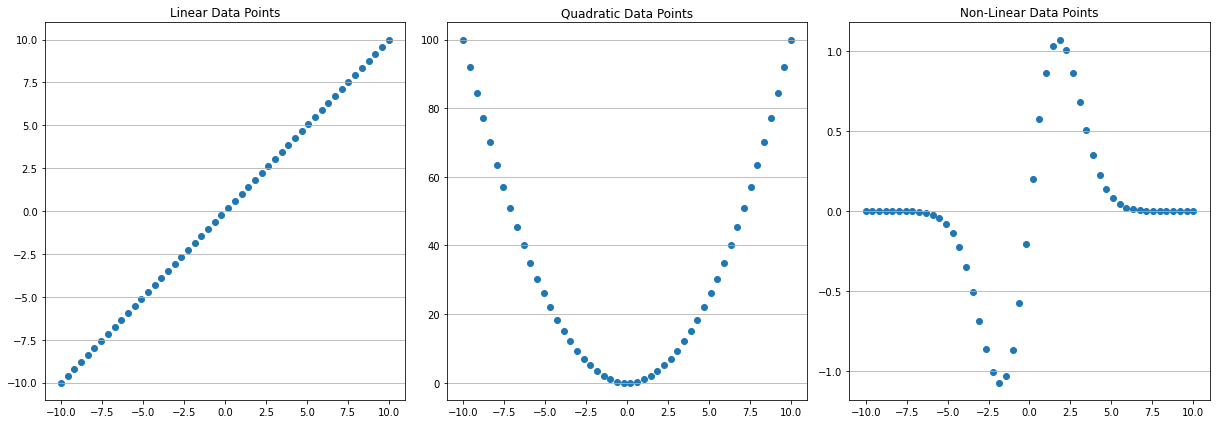

In [5]:
#Setting Domain Range
n = 10
#Setting Number of Data Points
num_points = 50

#Create Linear Model Data : x data, y data
x_lin, y_lin = linear_data(num_points, n)

#Create Quadratic Model Data : x data, y data
x_quad, y_quad = quad_data(num_points, n)

#Create Nonlinear Model Data : x data, y data
x_nonlin, y_nonlin = nonlin_data(num_points, n)

#Graph above datapoints
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 6))

#Graph Linear Data Points
ax1.scatter(x_lin, y_lin)
ax1.grid(axis='y')
ax1.set_title('Linear Data Points')

#Graph Quadratic Data Points
ax2.scatter(x_quad, y_quad)
ax2.grid(axis='y')
ax2.set_title('Quadratic Data Points')

#Graph Quadratic Data Points
ax3.scatter(x_nonlin, y_nonlin)
ax3.grid(axis='y')
ax3.set_title('Non-Linear Data Points')

plt.tight_layout()

## Regression Methods

Now that we have the data, I needed to create methods of developing models to align to the data we have created. I testest against three seperate models, a linear model, a smoothing cubic spline with 5 degrees of freedom model, and a smoothing cubic spline with 25 degrees of freedom model. From this I hope to be able to see what factors affect creating a function that best aligns with any given training data. <br/>
In order to ensure that my smoothing spline methods were operating with the correct degrees of freedom, I utilized the below method to determine the degrees of freedom a model was utilizing. 

In [6]:
#Given the smoothing variable and the data, calculate the degrees of freedom
def calc_df(x, s) :
    Y = np.identity(len(x))
    R = zeros([len(x),len(x)])
    for i in range(len(x)):
        yb=Y[:,i];
        R[:,i]=csaps(x,yb,x,smooth=s)
    return R.trace()

#### Test 1
$Y = β_{0} + β_{1}X$ (df=2)

My first method was a linear regression model with two degrees of freedom. I created a method to generate a model with a cubic smoothing spline model of two degrees of freedom. To do this I created a data point based, and then I ran a cubic smoothing spline method with a smoothing value of 0, which results in 2 degrees of freedom. I then presented the option to print the degrees of freedom if I desired it. I then returned the resulting y-function and the degrees of freedom for further analysis. 

In [7]:
#Graph a linear regression function
def lin_reg(x, y, color, df, ax) :
    #create the fitted x and y variables
    xs = np.linspace(x[0], x[-1], 150)
    ys = csaps(x, y, xs, smooth=0)

    #Plot the fitted line and return the values
    ax.plot(xs, ys, color=color)
    if(df) : 
        print("Degrees of Freedom : " + str(calc_df(xs, 0)))
    return ys, calc_df(xs, 0)

I then graphed the data points of each individual data point set. Then I graphed the fitting of my linear regression model to the data points. Generally speaking, it tends to not fit our data particularly well. There is not enough degrees of freedom to truly map to the points direction. 

Degrees of Freedom : 1.9999999999621716


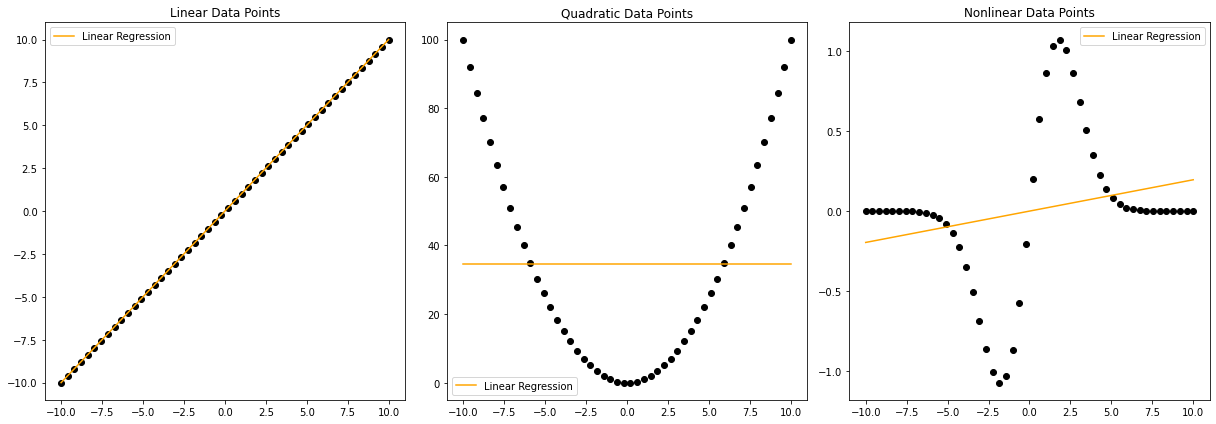

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 6))

#Graph the linear function onto the linear values
#Print degrees of freedom to validate
lin_reg(x_lin, y_lin, "orange", True, ax1)
ax1.scatter(x_lin, y_lin, color='black')
ax1.set_title("Linear Data Points")
ax1.legend(['Linear Regression'])

#Graph the linear function onto the quadratic values
lin_reg(x_quad, y_quad, "orange", False, ax2)
ax2.scatter(x_quad, y_quad, color='black')
ax2.set_title('Quadratic Data Points')
ax2.legend(['Linear Regression'])

#Graph the linear function onto the non-linear values
lin_reg(x_nonlin, y_nonlin, "orange", False, ax3)
ax3.scatter(x_nonlin, y_nonlin, color='black')
ax3.set_title('Nonlinear Data Points')
ax3.legend(['Linear Regression'])

plt.tight_layout()
plt.show()

#### Test 2
Smoothing Cubic spline with 5 Degrees of Freedom

My next method was a smoothing cubic spline of freedom model with five degrees of freedom. I created a method to generate a model with a cubic smoothing spline model of five degrees of freedom. To do this I created a data point based, and then I ran a cubic smoothing spline method with a smoothing value of .014, which results in 5 degrees of freedom. I then presented the option to print the degrees of freedom if I desired it. I then returned the resulting y-function and the degrees of freedom for further analysis. 

In [9]:
#Graph the smoothing cubic spline function with 5 degrees of freedom (.014 smoothing)
def smoothing_cubic_5(x, y, color, df, ax) :
    #Create the fitted x and y variables to graph
    xs = np.linspace(x[0], x[-1], 150)
    ys = csaps(x, y, xs, smooth=.014)

    #Plot the fitted line and return the degrees of freedom
    ax.plot(xs, ys, color=color)
    if(df) : 
        print("Degrees of Freedom : " + str(calc_df(xs, .014)))
    return ys, calc_df(xs, .014)

I then graphed the data points of each individual data point set. Then I graphed the fitting of my cubic smoothing spline model to the data points. It tended to speak most of my data well, but not the nonlinear data. It still does not have the degrees of freedom necessary to match all the ebbs of the model. However, with standard models, it fits extrememely well.

Degrees of Freedom : 5.059193985480865


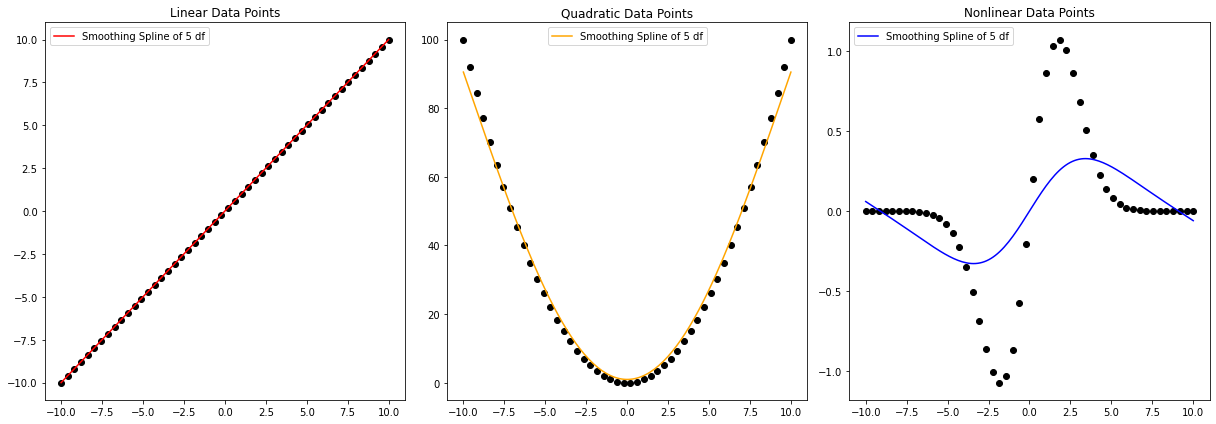

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 6))

#Graph the 5 degrees of freedom function onto the linear values
#Print the degrees of freedom to verify
smoothing_cubic_5(x_lin, y_lin, "red", True, ax1)
ax1.scatter(x_lin, y_lin, color='black')
ax1.set_title("Linear Data Points")
ax1.legend(['Smoothing Spline of 5 df'])

#Graph the 5 degrees of freedom function onto the quadratic values
smoothing_cubic_5(x_quad, y_quad, "orange", False, ax2)
ax2.scatter(x_quad, y_quad, color='black')
ax2.set_title('Quadratic Data Points')
ax2.legend(['Smoothing Spline of 5 df'])

#Graph the 5 degrees of freedom function onto the non-linear values
smoothing_cubic_5(x_nonlin, y_nonlin, "blue", False, ax3)
ax3.scatter(x_nonlin, y_nonlin, color='black')
ax3.set_title('Nonlinear Data Points')
ax3.legend(['Smoothing Spline of 5 df'])

plt.tight_layout()
plt.show()

#### Test 3
Smoothing Cubic spliine with effective degree of freedom approximately 25

My next method was a smoothing cubic spline of freedom model with twenty-five degrees of freedom. I created a method to generate a model with a cubic smoothing spline model of twenty-five degrees of freedom. To do this I created a data point based, and then I ran a cubic smoothing spline method with a smoothing value of .95, which results in 5 degrees of freedom. I then presented the option to print the degrees of freedom if I desired it. I then returned the resulting y-function and the degrees of freedom for further analysis. 

In [11]:
#Graph the smoothing cubic spline function with 25 degrees of freedom (.95 smoothing)
def smoothing_cubic_25(x, y, color, df, ax) :
    #Get the linespace we want to show and then determine the model that fits
    xs = np.linspace(x[0], x[-1], 150)
    ys = csaps(x, y, xs, smooth=.95)

    #Plot the fitted line and return the degrees of freedom
    ax.plot(xs, ys, color=color)
    if(df) : 
        print("Degrees of Freedom : " + str(calc_df(xs, .95)))
    return ys, calc_df(x, .95)

I then graphed the data points of each individual data point set. Then I graphed the fitting of my cubic smoothing spline model to the data points. It fit the general layout of all of my data points, however it did tend to overfit the quadratic data due to the higher degrees of freedom.

Degrees of Freedom : 25.533455029231092


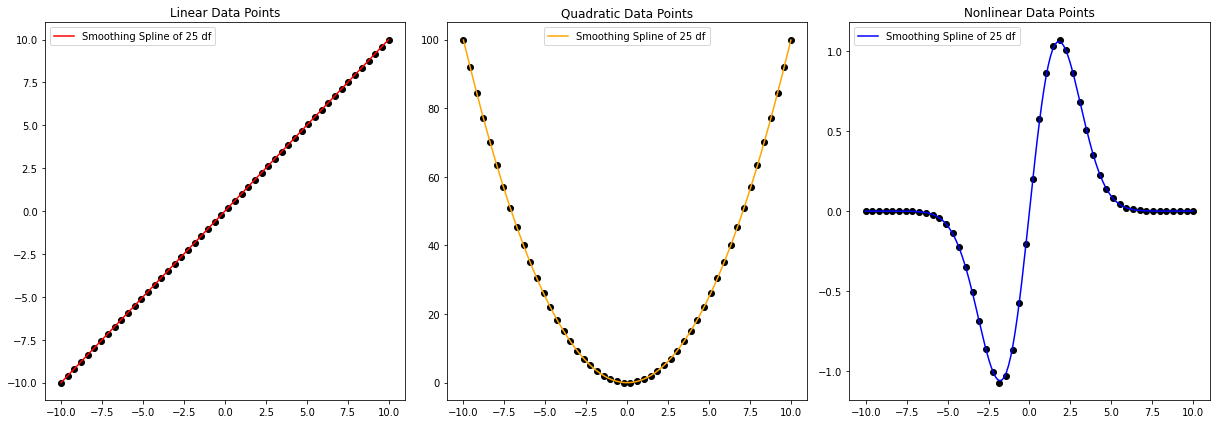

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 6))

#Graph the 25 degrees of freedom function onto the linear values
smoothing_cubic_25(x_lin, y_lin, "red", True, ax1)
ax1.scatter(x_lin, y_lin, color='black')
ax1.set_title("Linear Data Points")
ax1.legend(['Smoothing Spline of 25 df'])

#Graph the 25 degrees of freedom function onto the quadratic values
smoothing_cubic_25(x_quad, y_quad, "orange", False, ax2)
ax2.scatter(x_quad, y_quad, color='black')
ax2.set_title('Quadratic Data Points')
ax2.legend(['Smoothing Spline of 25 df'])

#Graph the 25 degrees of freedom function onto the non-linear values
smoothing_cubic_25(x_nonlin, y_nonlin, "blue", False, ax3)
ax3.scatter(x_nonlin, y_nonlin, color='black')
ax3.set_title('Nonlinear Data Points')
ax3.legend(['Smoothing Spline of 25 df'])

plt.tight_layout()
plt.show()

## Research Objective

Now that we have our data and our different methods of fitting that data, it is time to run the actual analysis method. I utilized the below method to create a sample of whatever data I develop. 

In [13]:
#Get a random sample of given data
def _draw_bootstrap_sample(rng, X, y):
    size_rdct = 10
    sample_indices = np.arange(len(y))
    bootstrap_indices = rng.choice(sample_indices, size=len(y)-size_rdct, replace=False)
    return X[bootstrap_indices], y[bootstrap_indices]

#### Linearity 
First I will check the performance of methods with different flexibility on data from linear to nonlinear
underlying functions. In order to do this, I had the 3 different models with varying degrees of linearity. That way I could see how each function performs based on how linear the data was. To analyze this, I broke up the values into testing and training values, and then I graphed each model onto each set of data. Additionally, I calculated the Mean Squared Error to get a measure of the linearity's effect. 

In [14]:
#Calculate average Mean Squared Error
def calc_MSE(num_rounds, X_train, y_train, X_test, y_test, p) :
    all_pred = np.zeros((num_rounds, len(y_test)), dtype=np.float64)

    for i in range(num_rounds):
        X_boot, y_boot = _draw_bootstrap_sample(np.random.RandomState(120) , X_train, y_train)
        X_boot, y_boot = (list(t) for t in zip(*sorted(zip(X_boot, y_boot))))
        pred = csaps(X_boot, y_boot, X_test,smooth=p)
        all_pred[i] = pred
        # compute the test MSE
        avg_expected_loss = np.apply_along_axis(lambda x: ((x - y_test) ** 2).mean(), axis=1, arr=all_pred).mean()

    return avg_expected_loss

Based on our below generation of plots, I was able to see that the higher degrees of freedom can consistently result in more accurate alignment to the given values. Whereas the lower degrees of freedom tend to not be able to align with the value that follow a more nonlinear pattern. Additionally, I can tell that the more flexibility a model has, the less accurate it tends to be. However, for the nonlienar model, it is by far the least mean squared error. From this I can draw the conclusion that the more linear the data is, the less degrees of freedom are necessary to create a good fit for the data. 

Text(0, 0.5, 'Mean Squared Error')

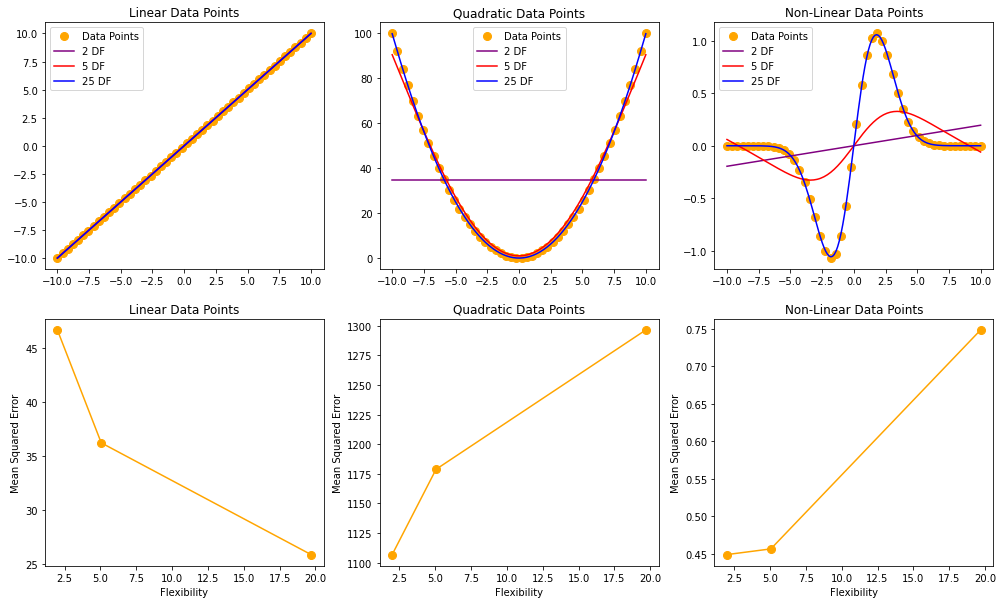

In [15]:
#Graph the performance of each function on different linearities
#Split all datapoints into testing a training
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(x_lin, y_lin, test_size=0.3, random_state=0)
X_train_quad, X_test_quad, y_train_quad, y_test_quad = train_test_split(x_quad, y_quad, test_size=0.3, random_state=0)
X_train_nonlin, X_test_nonlin, y_train_nonlin, y_test_nonlin = train_test_split(x_nonlin, y_nonlin, test_size=0.3, random_state=0)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(17, 10))

#Plot data points with linear data
ax1.plot(x_lin, y_lin, 'orange', marker="o", markersize=8, linestyle = 'None')

#Graph linear data fitted to each of the models
y_lin1, y_df1 = lin_reg(x_lin, y_lin, 'Purple', False, ax1)
y_lin2, y_df2 = smoothing_cubic_5(x_lin, y_lin, 'Red', False, ax1)
y_lin3, y_df3 = smoothing_cubic_25(x_lin, y_lin, 'Blue', False, ax1)
ax1.set_title("Linear Data Points")
ax1.legend(['Data Points', '2 DF','5 DF','25 DF'])

#Plot data points with quadratic data
ax2.plot(x_quad, y_quad, 'orange', marker="o", markersize=8, linestyle = 'None')

#Graph quadratic data fitted to each of the models
y_quad1, y_df1 = lin_reg(x_quad, y_quad, 'Purple', False, ax2)
y_quad2, y_df2 = smoothing_cubic_5(x_quad, y_quad, 'Red', False, ax2)
y_quad3, y_df3 = smoothing_cubic_25(x_quad, y_quad, 'Blue', False, ax2)
ax2.set_title("Quadratic Data Points")
ax2.legend(['Data Points', '2 DF','5 DF','25 DF'])

#Plot data points with non-linear data
ax3.plot(x_nonlin, y_nonlin, 'orange', marker="o", markersize=8, linestyle = 'None')

#Graph non-linear data fitted to each of the models
y_nonlin1, y_df1 = lin_reg(x_nonlin, y_nonlin, 'Purple', False, ax3)
y_nonlin2, y_df2 = smoothing_cubic_5(x_nonlin, y_nonlin, 'Red', False, ax3)
y_nonlin3, y_df3 = smoothing_cubic_25(x_nonlin, y_nonlin, 'Blue', False, ax3)
ax3.set_title("Non-Linear Data Points")
ax3.legend(['Data Points', '2 DF','5 DF','25 DF'])

#Each Graph shows mean squared vs flexibility for each set of points
#get the degrees of freedom for each value
flexibility = [y_df1, y_df2, y_df3]

#Graph the MSE for the linear data points at each flexibility
mse_1 = [calc_MSE(20, X_train_lin, y_test_lin, X_test_lin, y_test_lin, 0),calc_MSE(20, X_train_lin, y_test_lin, X_test_lin, y_test_lin, .014),calc_MSE(20, X_train_lin, y_test_lin, X_test_lin, y_test_lin, .95)]
ax4.plot(flexibility, mse_1, 'orange', marker='o',markersize=8)
ax4.set_title("Linear Data Points")
ax4.set_xlabel('Flexibility')
ax4.set_ylabel('Mean Squared Error')

#Graph the MSE for the quadratic data points at each flexibility
mse_2 = [calc_MSE(20, X_train_quad, y_test_quad, X_test_quad, y_test_quad, 0),calc_MSE(20, X_train_quad, y_test_quad, X_test_quad, y_test_quad, .014),calc_MSE(20, X_train_quad, y_test_quad, X_test_quad, y_test_quad, .95)]
ax5.plot(flexibility, mse_2, 'orange', marker='o',markersize=8)
ax5.set_title("Quadratic Data Points")
ax5.set_xlabel('Flexibility')
ax5.set_ylabel('Mean Squared Error')

#Graph the MSE for the non-linear data points at each flexibility
mse_3 = [calc_MSE(20, X_train_nonlin, y_test_nonlin, X_test_nonlin, y_test_nonlin, 0),calc_MSE(20, X_train_nonlin, y_test_nonlin, X_test_nonlin, y_test_nonlin, .014),calc_MSE(20, X_train_nonlin, y_test_nonlin, X_test_nonlin, y_test_nonlin, .95)]
ax6.plot(flexibility, mse_3, 'orange', marker='o',markersize=8)
ax6.set_title("Non-Linear Data Points")
ax6.set_xlabel('Flexibility')
ax6.set_ylabel('Mean Squared Error')

#### MSE, Bias, Variance 
Next, I analyzed how MSE, Bias, and Var vary with different flexibilities of models. <br/>
MSE($x$) = $\frac{1}{m}\sum\limits_{i=1}^m(y-\hat{y}_i)$ \
Bias$^2$($\hat{f}(x))= (\bar{\hat{y}}-y)^2$ \
Var$(\hat{f}(x)) = \frac{1}{m}\sum\limits_{i=1}^m(\bar{\hat{y}}-\hat{y}_i)$ \

In order to do this, I used the below method to graph the MSE, Bias, and Variance at each flexiblity over each dataset. I took a sample dataset from the training data, performed the method fitting, and then calculated each using the above equations. 

In [16]:
#Calculate average Mean Squared Erorr, Bias, Variance, 
def calc_avgs(num_rounds, X_train, y_train, X_test, y_test, p) :
    all_pred = np.zeros((num_rounds, len(y_test)), dtype=np.float64)

    #Go through random samples several times to get best possible values
    for i in range(num_rounds):
        X_boot, y_boot = _draw_bootstrap_sample(np.random.RandomState(120) , X_train, y_train)
        X_boot, y_boot = (list(t) for t in zip(*sorted(zip(X_boot, y_boot))))
        pred = csaps(X_boot, y_boot, X_test,smooth=p)
        all_pred[i] = pred
        # compute the test MSE
        avg_expected_loss = np.apply_along_axis(
        lambda x: ((x - y_test) ** 2).mean(), axis=1, arr=all_pred).mean()

        # mean prediction at x from all learned model 
        mean_predictions = np.mean(all_pred, axis=0) #the avarage at x from all models

        avg_bias = np.sum((mean_predictions - y_test) ** 2) / y_test.size
        avg_var = np.sum((mean_predictions - all_pred) ** 2) / all_pred.size

    return avg_expected_loss, avg_bias, avg_var

Based on the below graphs, I can tell that the higher degrees of freedom tend to have lower levels of variance, but the bias tends to remain higher overall. Additionally, when bias is higher variance is able to be close to zero, which shows there is a tradeoff between the two. However, as flexibility increases the bias tends to also increase, as well as the MSE. 

Text(0.5, 0, 'Flexibility')

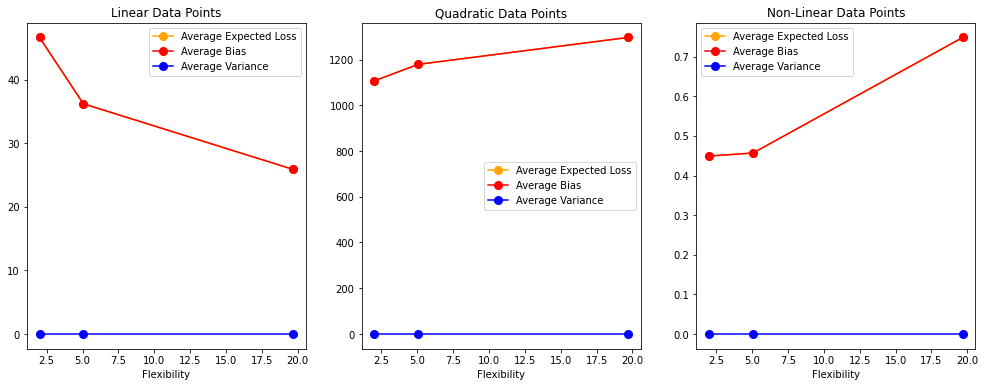

In [17]:
from sklearn.model_selection import train_test_split

#Each graph represents a different model, each line represents 
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(17, 6))
#Get the degrees of freedom for each function
flexibility = [y_df1, y_df2, y_df3]

#split each data set into testing and training
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(x_lin, y_lin,  test_size=0.3, random_state=0)
X_train_quad, X_test_quad, y_train_quad, y_test_quad = train_test_split(x_quad, y_quad, test_size=0.3, random_state=0)
X_train_nonlin, X_test_nonlin, y_train_nonlin, y_test_nonlin = train_test_split(x_nonlin, y_nonlin, test_size=0.3, random_state=0)

#Get the variables for each function on linear datasets
avg_expected_loss_lin, avg_bias_lin, avg_var_lin = calc_avgs(20, X_train_lin, y_test_lin, X_test_lin, y_test_lin, 0)
avg_expected_loss_quad, avg_bias_quad, avg_var_quad = calc_avgs(20, X_train_lin, y_test_lin, X_test_lin, y_test_lin, .014)
avg_expected_loss_nonlin, avg_bias_nonlin, avg_var_nonlin = calc_avgs(20, X_train_lin, y_test_lin, X_test_lin, y_test_lin,.95)
ax1.plot(flexibility, [avg_expected_loss_lin, avg_expected_loss_quad, avg_expected_loss_nonlin], 'orange', marker="o", markersize=8)
ax1.plot(flexibility, [avg_bias_lin, avg_bias_quad, avg_bias_nonlin], 'red', marker="o", markersize=8)
ax1.plot(flexibility, [avg_var_lin, avg_var_quad, avg_var_nonlin], 'blue', marker="o", markersize=8)
ax1.set_title("Linear Data Points")
ax1.legend(['Average Expected Loss','Average Bias','Average Variance'])
ax1.set_xlabel('Flexibility')

#Get the variables for each function on quadratic datasets
avg_expected_loss_lin, avg_bias_lin, avg_var_lin = calc_avgs(20, X_train_quad, y_test_quad, X_test_quad, y_test_quad, 0)
avg_expected_loss_quad, avg_bias_quad, avg_var_quad = calc_avgs(20, X_train_quad, y_test_quad, X_test_quad, y_test_quad,  .014)
avg_expected_loss_nonlin, avg_bias_nonlin, avg_var_nonlin = calc_avgs(20, X_train_quad, y_test_quad, X_test_quad, y_test_quad, .95)
ax2.plot(flexibility, [avg_expected_loss_lin, avg_expected_loss_quad, avg_expected_loss_nonlin], 'orange', marker="o", markersize=8)
ax2.plot(flexibility, [avg_bias_lin, avg_bias_quad, avg_bias_nonlin], 'red', marker="o", markersize=8)
ax2.plot(flexibility, [avg_var_lin, avg_var_quad, avg_var_nonlin], 'blue', marker="o", markersize=8)
ax2.set_title("Quadratic Data Points")
ax2.legend(['Average Expected Loss','Average Bias','Average Variance'])
ax2.set_xlabel('Flexibility')

#Get the variables for each function on non-linear datasets
avg_expected_loss_lin, avg_bias_lin, avg_var_lin = calc_avgs(20, X_train_nonlin, y_test_nonlin, X_test_nonlin, y_test_nonlin, 0)
avg_expected_loss_quad, avg_bias_quad, avg_var_quad = calc_avgs(20, X_train_nonlin, y_test_nonlin, X_test_nonlin, y_test_nonlin,  .014)
avg_expected_loss_nonlin, avg_bias_nonlin, avg_var_nonlin = calc_avgs(20, X_train_nonlin, y_test_nonlin, X_test_nonlin, y_test_nonlin, .95)
ax3.plot(flexibility, [avg_expected_loss_lin, avg_expected_loss_quad, avg_expected_loss_nonlin], 'orange', marker="o", markersize=8)
ax3.plot(flexibility, [avg_bias_lin, avg_bias_quad, avg_bias_nonlin], 'red', marker="o", markersize=8)
ax3.plot(flexibility, [avg_var_lin, avg_var_quad, avg_var_nonlin], 'blue', marker="o", markersize=8)
ax3.set_title("Non-Linear Data Points")
ax3.legend(['Average Expected Loss','Average Bias','Average Variance'])
ax3.set_xlabel('Flexibility')

#### Noise
Finally, I analyzed how the changes in the noise of the dataset affect the performance of different methods. In order to do this, I created the below function to plot each function on each seperate dataset, so that I can send in a new dataset with new noise factors and see what the affect is. From there, I was able to create datasets with 3 different levels of noise, so as to compare how each function reacts.

In [18]:
def plot_functions(x_lin, y_lin, x_quad, y_quad, x_nonlin, y_nonlin, ax1, ax2, ax3) : 
    #Graph all the functions on a linear value
    ax1.plot(x_lin, y_lin, 'orange', marker="o", markersize=8, linestyle = 'None')
    y_nonlin1, y_df1 = lin_reg(x_lin, y_lin, 'Purple', False, ax1)
    y_nonlin2, y_df2 = smoothing_cubic_5(x_lin, y_lin, 'Red', False, ax1)
    y_nonlin3, y_df3 = smoothing_cubic_25(x_lin, y_lin, 'Blue', False, ax1)
    ax1.set_title("Noise with a Low Magnitude")
    ax1.legend(['Data Points', '2 DF','5 DF','25 DF'])

    #Graph all the functions on a quadratic value
    ax2.plot(x_quad, y_quad, 'orange', marker="o", markersize=8, linestyle = 'None')
    y_nonlin1, y_df1 = lin_reg(x_quad, y_quad, 'Purple', False, ax2)
    y_nonlin2, y_df2 = smoothing_cubic_5(x_quad, y_quad, 'Red', False, ax2)
    y_nonlin3, y_df3 = smoothing_cubic_25(x_quad, y_quad, 'Blue', False, ax2)
    ax2.set_title("Noise with a Medium Magnitude")
    ax2.legend(['Data Points', '2 DF','5 DF','25 DF'])
    
    #Graph all the functions on a non-linear value
    ax3.plot(x_nonlin, y_nonlin, 'orange', marker="o", markersize=8, linestyle = 'None')
    y_nonlin1, y_df1 = lin_reg(x_nonlin, y_nonlin, 'Purple', False, ax3)
    y_nonlin2, y_df2 = smoothing_cubic_5(x_nonlin, y_nonlin, 'Red', False, ax3)
    y_nonlin3, y_df3 = smoothing_cubic_25(x_nonlin, y_nonlin, 'Blue', False, ax3)
    ax3.set_title("Noise with a High Magnitude")
    ax3.legend(['Data Points', '2 DF','5 DF','25 DF'])

From the below graphs, I can see that the linear model with 2 degrees of freedom tends to be unaffected by increases in noise level. Whereas the functions with the higher degrees of freedom tend to be more swayed towards the functions with the higher noise levels rather than adhereing to the base lines. 

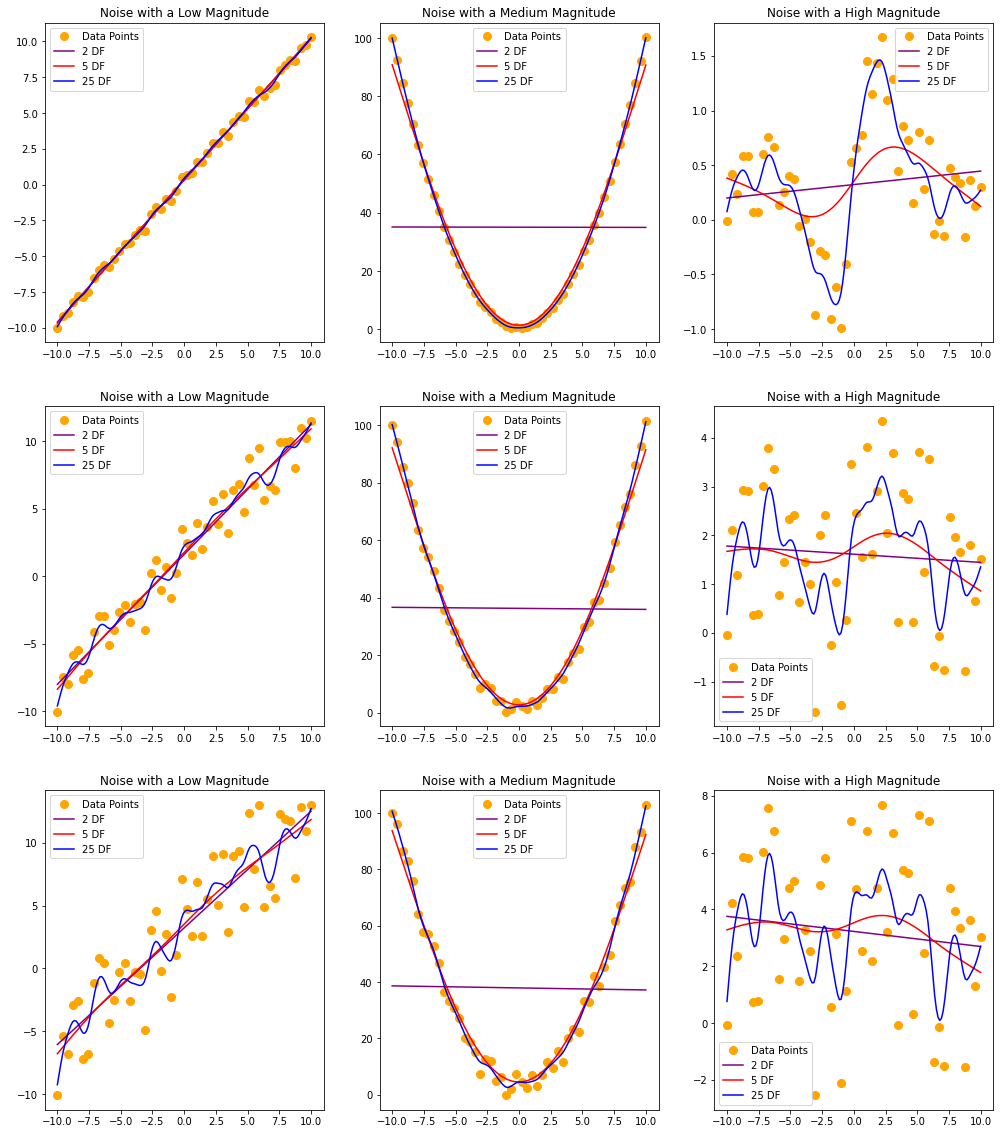

In [19]:
#Regenerate each dataset with changes in noise
#Each layer is a different level of noise, with each different data level
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(17, 20))

#Create data points with a noise level of 1
x_lin, y_lin = linear_data(num_points, n, 1234, 1)
x_quad, y_quad = quad_data(num_points, n, 1234, 1)
x_nonlin, y_nonlin = nonlin_data(num_points, n, 1234, 1)

#Graph all models on new dataset
plot_functions(x_lin, y_lin, x_quad, y_quad, x_nonlin, y_nonlin, ax1, ax2, ax3)

#Create data points with a noise level of 5
x_lin, y_lin = linear_data(num_points, n, 1234, 5)
x_quad, y_quad = quad_data(num_points, n, 1234, 5)
x_nonlin, y_nonlin = nonlin_data(num_points, n, 1234, 5)

#Graph all models on new dataset
plot_functions(x_lin, y_lin, x_quad, y_quad, x_nonlin, y_nonlin, ax4, ax5, ax6)

#Create data points with a noise level of 10
x_lin, y_lin = linear_data(num_points, n, 1234, 10)
x_quad, y_quad = quad_data(num_points, n, 1234, 10)
x_nonlin, y_nonlin = nonlin_data(num_points, n, 1234, 10)

#Graph all models on new dataset
plot_functions(x_lin, y_lin, x_quad, y_quad, x_nonlin, y_nonlin, ax7, ax8, ax9)

## Conclusion

Ultimately, as we break down each individual analysis, we can see some trends arise with the varying degrees of freedom. Generally we can see that the more variation and lack of linearity the original dataset has, the more degrees of freedom are necessary to fit the overall function correctly. However with those higher degrees of freedom, the risk of overfitting becomes more prevelant as noise increases. Therefore, in order to ensure the best possible fit, it should be analyzed for a degree of freedom that still allows for a general shape to form without being too swayed by noise overall. 